Let's kick things off by importing the packages I'll be using to manipulate dataframes and do some simple visualizations.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the data for 
data = pd.read_csv('Data/weekly_data.csv')

In [4]:
# Print the shapes of the dataframe

print('Data: ', data.shape) 
data.head(15)

Data:  (31538, 65)


,Unnamed: 0,Unnamed: 0.1,GameKey,PlayerID,Season,GameDate,Week,Team,Opponent,HomeOrAway,...,FieldGoalsMade40to49,FieldGoalsMade50Plus,InjuryStatus,MatchString,HomeTeam,HomePoints,HomeYards,AwayTeam,AwayPoints,AwayYards
0,0,0,201810122,8283,2018,2018-09-09T13:00:00,1,TB,NO,AWAY,...,0.0,0.0,NaN,20181TBNO,NO,40.0,475.0,TB,48.0,529.0
1,1,1,201810122,18878,2018,2018-09-09T13:00:00,1,NO,TB,HOME,...,0.0,0.0,NaN,20181TBNO,NO,40.0,475.0,TB,48.0,529.0
2,2,2,201810122,7242,2018,2018-09-09T13:00:00,1,NO,TB,HOME,...,0.0,0.0,NaN,20181TBNO,NO,40.0,475.0,TB,48.0,529.0
3,4,4,201810129,18082,2018,2018-09-09T16:05:00,1,KC,LAC,AWAY,...,0.0,0.0,NaN,20181KCLAC,LAC,28.0,541.0,KC,38.0,362.0
4,5,5,201810108,18983,2018,2018-09-09T13:00:00,1,PIT,CLE,AWAY,...,0.0,0.0,NaN,20181PITCLE,CLE,21.0,327.0,PIT,21.0,472.0
5,6,6,201810129,8244,2018,2018-09-09T16:05:00,1,LAC,KC,HOME,...,0.0,0.0,NaN,20181KCLAC,LAC,28.0,541.0,KC,38.0,362.0
6,7,7,201810129,18890,2018,2018-09-09T16:05:00,1,KC,LAC,AWAY,...,0.0,0.0,NaN,20181KCLAC,LAC,28.0,541.0,KC,38.0,362.0
7,8,8,201810122,3943,2018,2018-09-09T13:00:00,1,TB,NO,AWAY,...,0.0,0.0,Questionable,20181TBNO,NO,40.0,475.0,TB,48.0,529.0
8,10,10,201810112,2593,2018,2018-09-09T20:20:00,1,GB,CHI,HOME,...,0.0,0.0,Probable,20181CHIGB,GB,24.0,370.0,CHI,23.0,294.0
9,12,12,201810108,12831,2018,2018-09-09T13:00:00,1,CLE,PIT,HOME,...,0.0,0.0,NaN,20181PITCLE,CLE,21.0,327.0,PIT,21.0,472.0


In [5]:
# Get a list of the columns present in the dataset
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'GameKey', 'PlayerID', 'Season',
       'GameDate', 'Week', 'Team', 'Opponent', 'HomeOrAway', 'Number', 'Name',
       'Position', 'Started', 'PassingAttempts', 'PassingCompletions',
       'PassingYards', 'PassingCompletionPercentage', 'PassingYardsPerAttempt',
       'PassingYardsPerCompletion', 'PassingTouchdowns',
       'PassingInterceptions', 'PassingRating', 'PassingLong', 'PassingSacks',
       'PassingSackYards', 'RushingAttempts', 'RushingYards',
       'RushingYardsPerAttempt', 'RushingTouchdowns', 'RushingLong',
       'ReceivingTargets', 'Receptions', 'ReceivingYards',
       'ReceivingYardsPerReception', 'ReceivingTouchdowns', 'ReceivingLong',
       'Fumbles', 'FumblesLost', 'PuntReturns', 'PuntReturnYards',
       'PuntReturnTouchdowns', 'KickReturns', 'KickReturnYards',
       'KickReturnTouchdowns', 'FieldGoalsAttempted', 'FieldGoalsMade',
       'ExtraPointsMade', 'TwoPointConversionPasses', 'TwoPointConversionRuns',
       'TwoPo

In [6]:
data['FantasyPointsPPR'].isna().sum()

0

In [7]:
data = data[data['FantasyPointsPPR'] != 0]

In [8]:
data.head()

,Unnamed: 0,Unnamed: 0.1,GameKey,PlayerID,Season,GameDate,Week,Team,Opponent,HomeOrAway,...,FieldGoalsMade40to49,FieldGoalsMade50Plus,InjuryStatus,MatchString,HomeTeam,HomePoints,HomeYards,AwayTeam,AwayPoints,AwayYards
0,0,0,201810122,8283,2018,2018-09-09T13:00:00,1,TB,NO,AWAY,...,0.0,0.0,NaN,20181TBNO,NO,40.0,475.0,TB,48.0,529.0
1,1,1,201810122,18878,2018,2018-09-09T13:00:00,1,NO,TB,HOME,...,0.0,0.0,NaN,20181TBNO,NO,40.0,475.0,TB,48.0,529.0
2,2,2,201810122,7242,2018,2018-09-09T13:00:00,1,NO,TB,HOME,...,0.0,0.0,NaN,20181TBNO,NO,40.0,475.0,TB,48.0,529.0
3,4,4,201810129,18082,2018,2018-09-09T16:05:00,1,KC,LAC,AWAY,...,0.0,0.0,NaN,20181KCLAC,LAC,28.0,541.0,KC,38.0,362.0
4,5,5,201810108,18983,2018,2018-09-09T13:00:00,1,PIT,CLE,AWAY,...,0.0,0.0,NaN,20181PITCLE,CLE,21.0,327.0,PIT,21.0,472.0


### What does the distribution of fantasy points look like?

<AxesSubplot:xlabel='FantasyPointsPPR', ylabel='Count'>

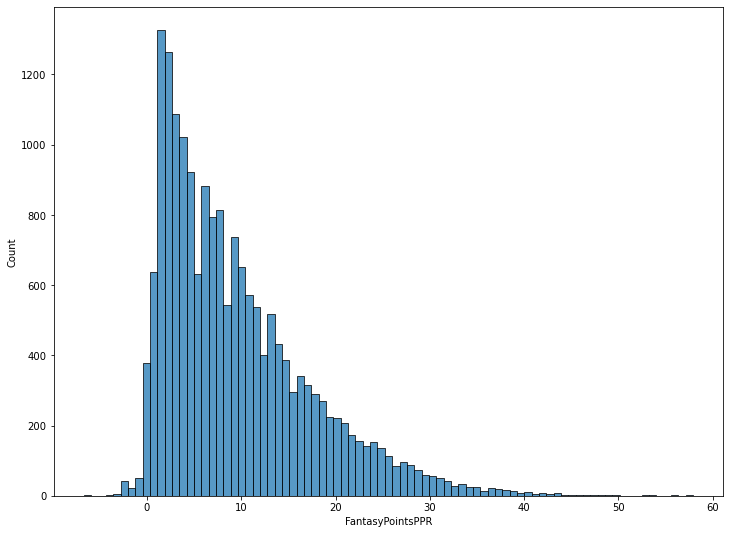

In [9]:
plt.figure(figsize = (12, 9))
sns.histplot(data['FantasyPointsPPR'])

In [10]:
data['LogFantasyPointsPPR'] = np.log(data['FantasyPointsPPR'])
data['LogFantasyPointsPPR'].isna().sum()

274

<AxesSubplot:xlabel='LogFantasyPointsPPR', ylabel='Count'>

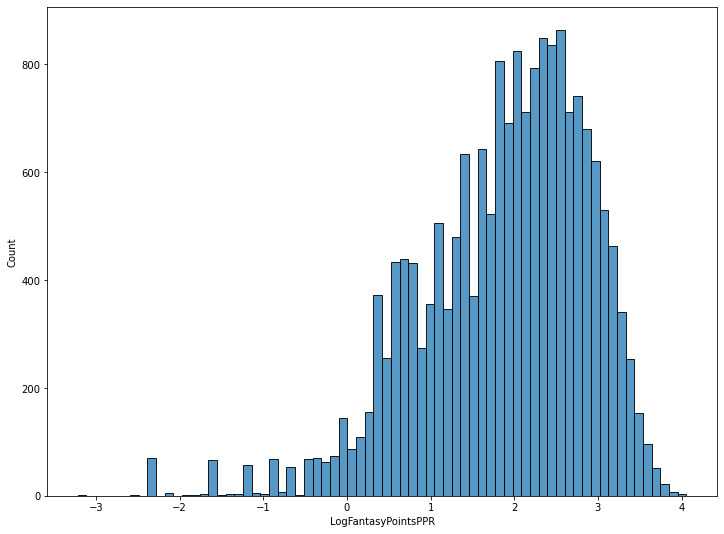

In [11]:
plt.figure(figsize = (12, 9))
sns.histplot(data['LogFantasyPointsPPR'])

### Yardage Contribution

Make a column, 'TotalYards' for the total yards accumulated by a player through rushing, receiving and passing.
Define a function that calculates the percentage of team yardage gains that a player contributed to.

In [12]:
data['TotalYards'] = data['RushingYards'] + data['ReceivingYards'] + data['PassingYards']
data.describe()

,Unnamed: 0,Unnamed: 0.1,GameKey,PlayerID,Season,Week,Number,Started,PassingAttempts,PassingCompletions,...,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,HomePoints,HomeYards,AwayPoints,AwayYards,LogFantasyPointsPPR,TotalYards
count,18510.000000,18510.000000,1.851000e+04,18510.000000,18510.000000,18510.000000,18510.000000,18510.000000,18510.000000,18510.000000,...,18510.000000,18510.000000,18510.000000,18510.000000,18510.000000,18510.000000,18510.000000,18510.000000,18236.000000,18510.000000
mean,50007.902431,387.782280,2.019448e+08,17268.192977,2019.339492,8.441545,33.619665,0.520800,3.456996,2.236521,...,0.041869,0.048947,0.044354,0.019395,24.067585,355.638250,23.343760,352.305132,1.874417,61.552242
std,29961.914990,325.689615,1.050467e+05,4281.769837,1.051400,4.923633,30.607181,0.499581,10.549758,6.892122,...,0.238921,0.260046,0.249975,0.154189,10.176174,85.876783,10.304903,88.584961,1.009563,80.718719
min,0.000000,0.000000,2.018101e+08,549.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,0.000000,47.000000,-3.218876,-28.000000
25%,23515.250000,116.000000,2.018116e+08,16020.000000,2018.000000,4.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,17.000000,295.000000,17.000000,290.000000,1.252763,10.000000
50%,50323.500000,333.000000,2.019115e+08,18478.000000,2019.000000,8.000000,19.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,24.000000,360.000000,23.000000,352.000000,2.054124,34.000000
75%,76353.750000,600.000000,2.020113e+08,19943.000000,2020.000000,13.000000,48.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,31.000000,413.000000,30.000000,415.000000,2.624669,75.000000
max,101825.000000,1905.000000,2.021110e+08,23086.000000,2021.000000,17.000000,89.000000,1.000000,68.000000,45.000000,...,4.000000,4.000000,3.000000,3.000000,56.000000,607.000000,59.000000,643.000000,4.058717,517.000000


In [13]:
def offensive_contribution(df):
    if df['HomeOrAway'] == 'HOME':
        contribution =  df['TotalYards'] / df['HomeYards']
        if contribution > 1:
            return 1.0
        else:
            return contribution
    elif df['HomeOrAway'] == 'AWAY':
        contribution =  df['TotalYards'] / df['AwayYards'] 
        if contribution > 1:
            return 1.0
        else:
            return contribution

In [14]:
data['YardageContribution'] = data.apply(lambda x: offensive_contribution(x), axis = 1)
data[['Name','Team', 'Opponent','HomeOrAway','RushingYards', 'PassingYards', 'ReceivingYards', 'TotalYards',
      'HomeYards','AwayYards', 'YardageContribution', 'MatchString']].sort_values(by = 'YardageContribution',
                ascending = False).head(5)

,Name,Team,Opponent,HomeOrAway,RushingYards,PassingYards,ReceivingYards,TotalYards,HomeYards,AwayYards,YardageContribution,MatchString
27606,Tom Brady,TB,LAR,AWAY,14.0,432.0,0.0,446.0,407.0,446.0,1.0,20213TBLAR
6616,Deshaun Watson,HOU,NYJ,AWAY,26.0,294.0,0.0,320.0,318.0,286.0,1.0,201815HOUNYJ
28181,Jacoby Brissett,MIA,IND,HOME,8.0,199.0,0.0,207.0,203.0,349.0,1.0,20214INDMIA
7888,Blake Bortles,JAX,HOU,AWAY,15.0,107.0,0.0,122.0,342.0,119.0,1.0,201817JAXHOU
7947,Josh Johnson,WAS,PHI,HOME,4.0,91.0,0.0,95.0,89.0,360.0,1.0,201817PHIWAS


<AxesSubplot:xlabel='YardageContribution', ylabel='LogFantasyPointsPPR'>

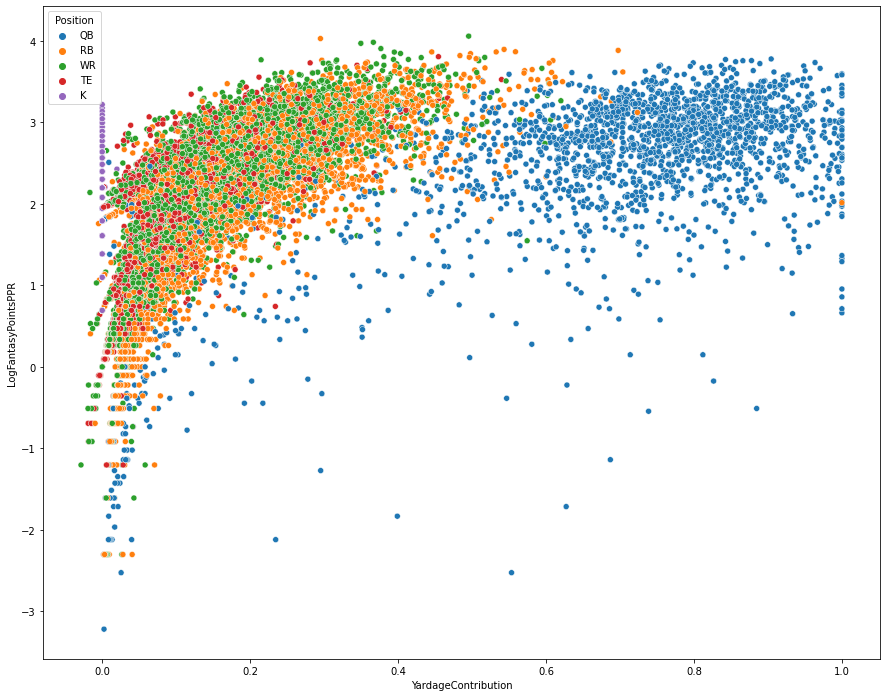

In [15]:
plt.figure(figsize = (15, 12))
sns.scatterplot(x = data['YardageContribution'],
               y = data['LogFantasyPointsPPR'],
               hue = data['Position'])

### Rushing Yards
Let's explore the relatinship between rushing yards per game and mean fantasy points over the course of the season.  <br>
As seen below, it is obvious that the number of rushing yards a player obtains sets the floor for a minimum number of fantasy points obtained.

In [16]:
# Filter only players at the running back position
running_backs = data[data['Position'] == 'RB'][['Name', 'RushingYards','FantasyPointsPPR', 'LogFantasyPointsPPR']]

# Group all statistics for individual players at the position by mean value
running_backs.groupby('Name').mean().sort_values(by = 'RushingYards', ascending = False).head(10)

,RushingYards,FantasyPointsPPR,LogFantasyPointsPPR
Name,,,
Derrick Henry,101.145455,18.588364,2.692113
Dalvin Cook,85.978261,19.389130,2.823870
Jonathan Taylor,84.240000,18.552000,2.786865
Nick Chubb,83.882353,15.262745,2.415145
Ezekiel Elliott,80.618182,18.615636,2.822514
Elijah Mitchell,80.000000,12.900000,2.492974
Christian McCaffrey,76.450000,26.155000,3.162983
Joe Mixon,74.866667,16.164444,2.647703
Chris Carson,73.200000,14.886667,2.567992


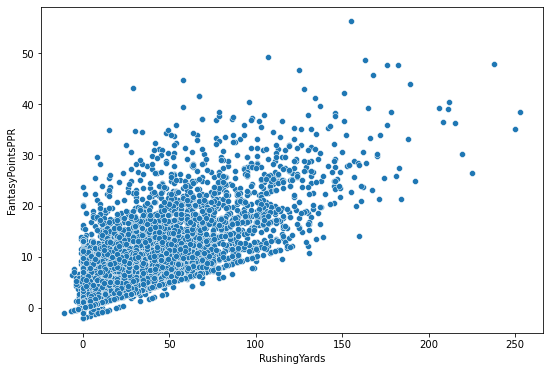

In [17]:
# Plot fantasy point production against rushing yards
plt.figure(figsize = (9,6))
sns.scatterplot(x = running_backs['RushingYards'],
        y = running_backs['FantasyPointsPPR'])
plt.xlabel = ('Mean Rushing Yards')
plt.ylabel = ('Mean Fantasy Points (PPR)')
plt.title = ('Impact of Rushing Yards on Fantasy Point Production')

### Touchdowns

Let's explore the comparative impact that a touchdown has on the performance of a player.

In [18]:
# Create a new column for total touchdowns
TD_sum = data['ReceivingTouchdowns'] + data['RushingTouchdowns'] + data['PassingTouchdowns']
data['TotalTouchdowns'] = TD_sum

# Group the data by player and get the averages
touchdowns = data[['Name', 'TotalTouchdowns', 'FantasyPointsPPR','LogFantasyPointsPPR', 'Position']]
touchdowns = touchdowns.groupby(['Name', 'Position']).mean().sort_values(by='TotalTouchdowns', ascending = False)
touchdowns.reset_index(inplace = True)
touchdowns.head(10)

,Name,Position,TotalTouchdowns,FantasyPointsPPR,LogFantasyPointsPPR
0,Patrick Mahomes,QB,2.654545,23.651273,3.100066
1,Andrew Luck,QB,2.437500,20.495000,2.962654
2,Justin Herbert,QB,2.375000,21.847500,2.983186
3,Drew Brees,QB,2.368421,19.453158,2.886007
4,Tom Brady,QB,2.263158,19.259649,2.843720
5,Russell Wilson,QB,2.259259,20.223704,2.922253
6,Aaron Rodgers,QB,2.175439,19.995789,2.848514
7,Josh Allen,QB,2.169811,20.923774,2.852123
8,Deshaun Watson,QB,2.148936,21.744681,2.986496
9,Dak Prescott,QB,2.111111,20.756000,2.938415


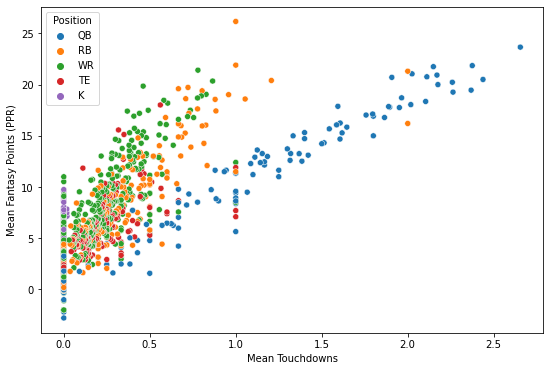

In [19]:
# Plot fantasy point production against total touchdowns
plt.figure(figsize = (9,6))
ax = sns.scatterplot(x = touchdowns['TotalTouchdowns'],
                y = touchdowns['FantasyPointsPPR'],
                    hue = touchdowns['Position'])
ax.set(xlabel = 'Mean Touchdowns', 
       ylabel = 'Mean Fantasy Points (PPR)')
plt.title = ('Impact of Touchdowns on Fantasy Point Production')

From the above chart, we can see that the position most dependent on touchdowns is the quarterback, followed in order by the running back, wide receiver, tight end and finally the kicker.

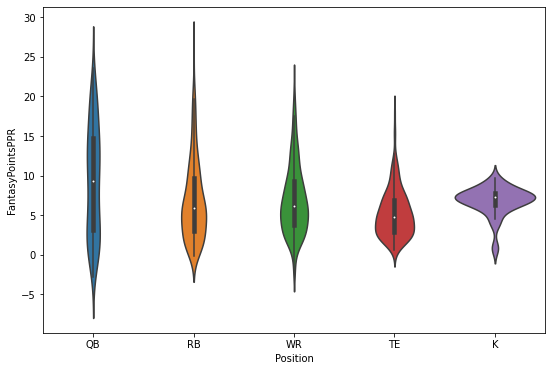

In [20]:
# Let's visualize this same data a little differently using a violin plot

plt.figure(figsize = (9, 6))
ax = sns.violinplot(x = touchdowns['Position'],
                y = touchdowns['FantasyPointsPPR'])

### Does Home Field Advantage Matter?

<AxesSubplot:xlabel='Week', ylabel='FantasyPointsPPR'>

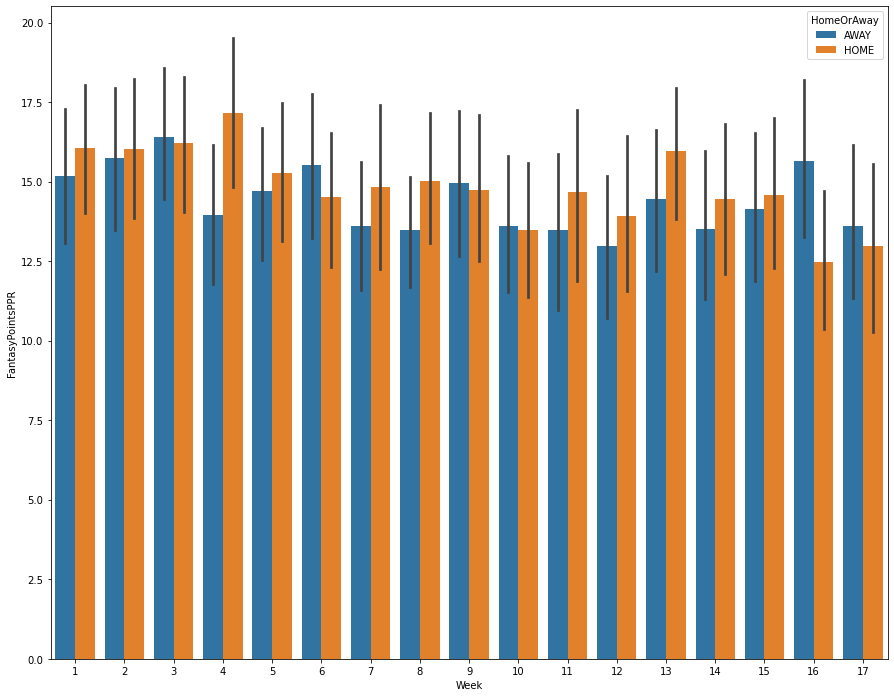

In [21]:
plt.figure(figsize = (15, 12))
sns.barplot(x = data["Week"],
           y = data[data['Position'] == 'QB']['FantasyPointsPPR'],
           hue = data["HomeOrAway"])

### What kind of impact does a player's team have on fantasy output?  How about their opponent?

<AxesSubplot:xlabel='Team', ylabel='FantasyPointsPPR'>

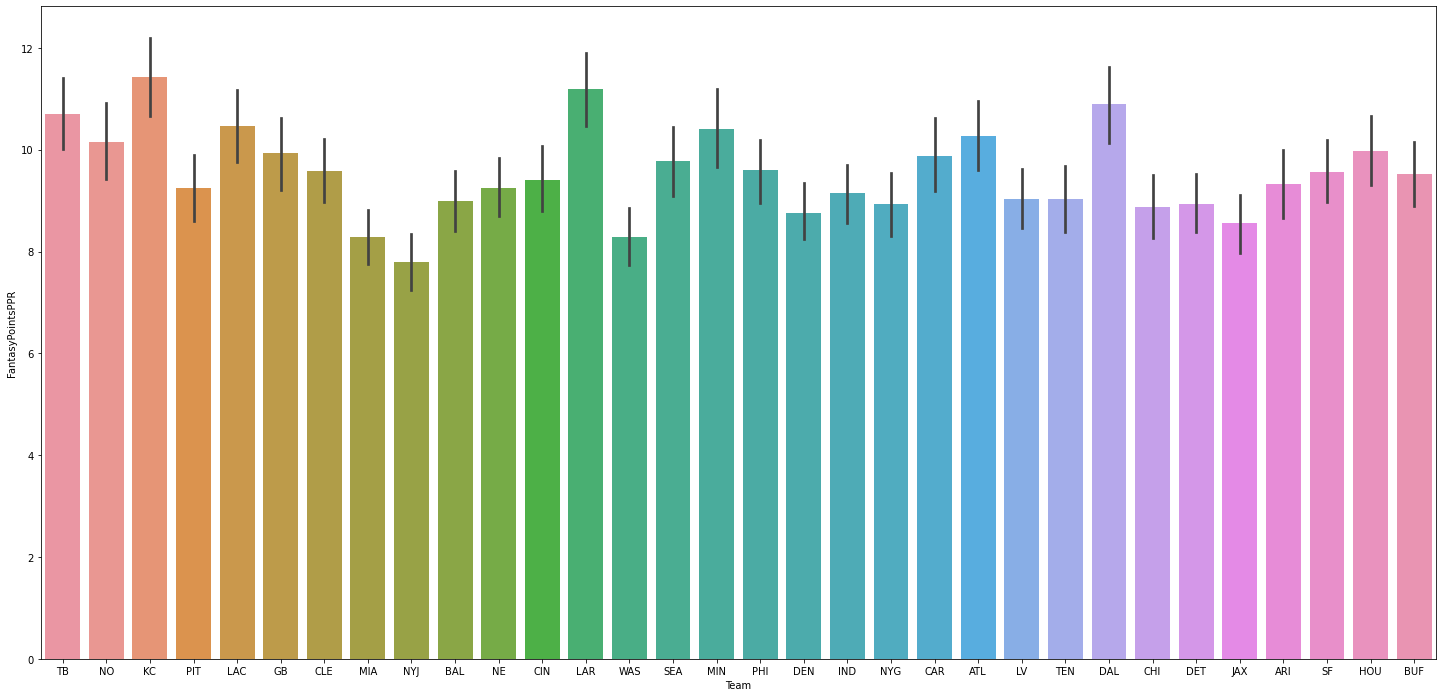

In [22]:
plt.figure(figsize = (25, 12))
sns.barplot(x = data["Team"],
           y = data['FantasyPointsPPR'])

<AxesSubplot:xlabel='Opponent', ylabel='FantasyPointsPPR'>

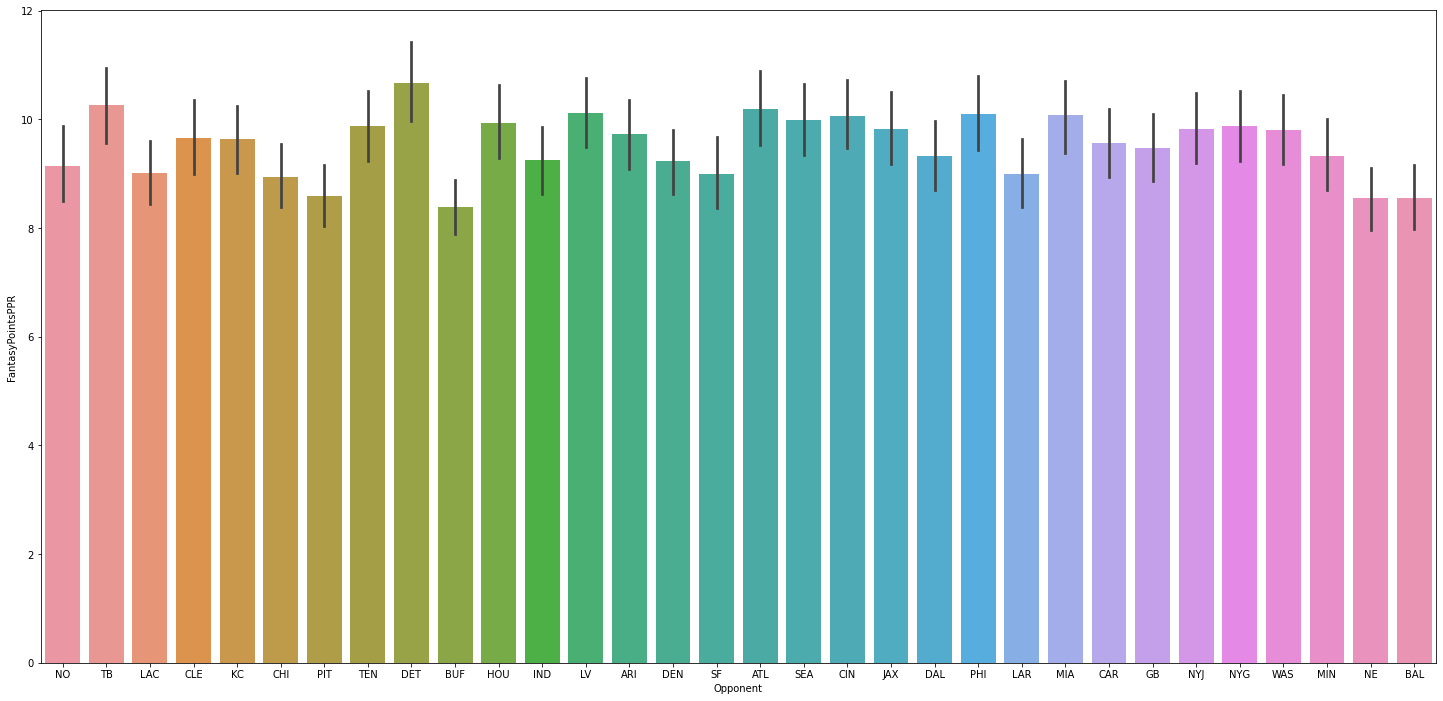

In [23]:
plt.figure(figsize = (25, 12))
sns.barplot(x = data["Opponent"],
           y = data['FantasyPointsPPR'])

### What is going on in the InjuryStatus column?

In [24]:
data['InjuryStatus'].unique()

array([nan, 'Questionable', 'Probable', 'Out', 'Doubtful'], dtype=object)

We can see that healthy players get a description of NaN, while any player with an injury designation is given a value.

<br>
<br>

### Create a function to create a trailing average or sum for a particular statistic

Using trailing aggregate statistics will be an important tool for predicting the future performance of players.  <br>
Below I will define a function that will be the basis for many of the transformations I will perform.

In [25]:
def trailing_stats_mean(df, column, window):
    
    """
    Function to create a new column with a trailing aggregate mean
    as a new feature for prediction.
    
    Inputs:
        - df: The dataframe on which the function will be applied
        - Column: The column on which to apply the function
        - Window: The number of past values to consider when apply the function

        
    Output:
        - An aggregate value
        
    """
    # Get all unique players in the DataFrame
    players = df['Name'].unique().tolist()
    
    # Define a DataFrame to hold our values
    df_out = pd.DataFrame()
    # Loop through the unique players
    for player in players:
        # Create a temporary dataframe for each player
        temp_df = df[df['Name'] == player]
        # Calculate the n game trailing average for all players.  Set closed parameter to 'left'
        # so that the current value for fantasy points is not included in the calculation.
        # Backfill the two resulting NaN values
        temp_df[f'TA{column}'] = temp_df[column].rolling(window = window,
                                                                     closed = 'left').mean().fillna(method = 'bfill')
        # Append the temporary dataframe to the output
        df_out = df_out.append(temp_df)
    # Return a dataframe with the values sorted by the original index
    return df_out.sort_index()
    


Create some trailing aggregate stats that can be used as predictive indicators of future player performance.

In [26]:
# Apply the above function to the columns I want to use to create trailing indicators for

trailing_columns = ['FantasyPointsPPR',
                   'TotalTouchdowns',
                   'RushingYards',
                   'PassingInterceptions',
                   'PassingYards',
                   'PassingCompletionPercentage',
                   'Receptions',
                   'ReceivingYards',
                    'ReceivingTargets',
                   'Fumbles',
                   'FumblesLost',
                   'YardageContribution']
df_rolling = data
for col in trailing_columns:
    df_rolling = trailing_stats_mean(df_rolling, col, 5)

    
df_rolling.head()


,Unnamed: 0,Unnamed: 0.1,GameKey,PlayerID,Season,GameDate,Week,Team,Opponent,HomeOrAway,...,TARushingYards,TAPassingInterceptions,TAPassingYards,TAPassingCompletionPercentage,TAReceptions,TAReceivingYards,TAReceivingTargets,TAFumbles,TAFumblesLost,TAYardageContribution
0,0,0,201810122,8283,2018,2018-09-09T13:00:00,1,TB,NO,AWAY,...,16.0,1.0,310.0,68.02,0.0,0.0,0.0,0.4,0.0,0.702379
1,1,1,201810122,18878,2018,2018-09-09T13:00:00,1,NO,TB,HOME,...,59.8,0.0,0.0,0.00,7.6,70.2,10.2,0.0,0.0,0.313038
2,2,2,201810122,7242,2018,2018-09-09T13:00:00,1,NO,TB,HOME,...,1.2,0.0,331.6,77.54,0.2,0.2,0.2,0.2,0.0,0.786143
3,4,4,201810129,18082,2018,2018-09-09T16:05:00,1,KC,LAC,AWAY,...,7.4,0.0,0.0,0.00,5.4,85.0,7.8,0.0,0.0,0.230986
4,5,5,201810108,18983,2018,2018-09-09T13:00:00,1,PIT,CLE,AWAY,...,68.4,0.0,0.0,0.00,4.4,47.8,5.6,0.4,0.2,0.282828


Check the NaN values for the new column that we've created.  Turns out that they are rooking players who don't have enough games under their belt to have a 3 point average.  I will have to figure out the best strategy for dealing with these guys.  I can either drop them or I can impute a median value for their performances.

In [27]:

df_rolling[df_rolling['TAFantasyPointsPPR'].isna()].groupby('Name')['Name'].value_counts().head()

Name               Name             
AJ Derby           AJ Derby             3
AJ McCarron        AJ McCarron          4
Alex Tanney        Alex Tanney          1
Alexander Hollins  Alexander Hollins    1
Amari Rodgers      Amari Rodgers        3
Name: Name, dtype: int64

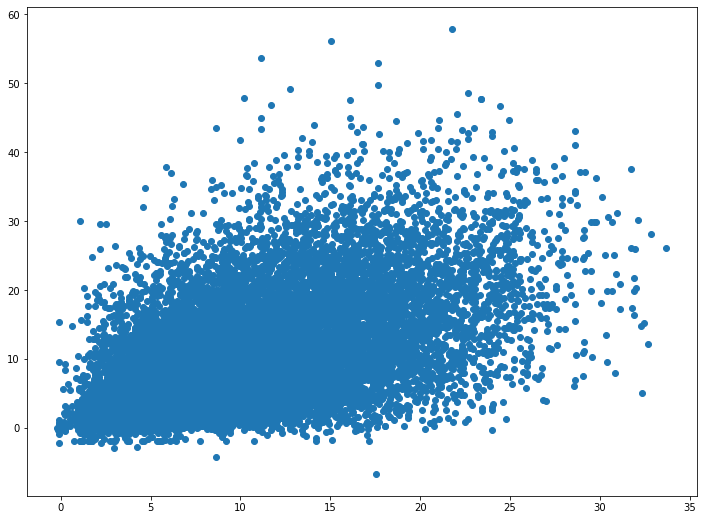

In [28]:
# Let's compare actual fantasy points to the trailing fantasy points values
plt.figure(figsize = (12,9))
plt.scatter(df_rolling['TAFantasyPointsPPR'],
        df_rolling['FantasyPointsPPR'])

<br> <br>
### Ranking players by tier
In fantasy football, it is common practice to refer to players by their tier level at a given position.  For example, a running back who is expected to average around 18 points in a given week is considered an RB1.  If a player is expected to get 15 points, we refer to them as an RB2 and so on.  Let's explore this idea to see if it carries any weight for trying to make our predictions.  Rather than assigning a player a permanent value, let's use their rolling fantasy points average to assign a tier.  Could explore using a a larger window for this assignment.

In [29]:
def tier_maker(position, points):
    
    """
    Take in two arguments:
    
     - Position: Column of the dataframe holding the player position
     - Points: Trailing average of fantasy points for a given player
    
    Classify players at every position to a tier based on their recent 
    performance (Trailing average fantasy points). Classifications will work
    as follows.
    
    Running Back:
        -RB1: Trailing average greater than 18pts
        -RB2: Trailing average between 12 and 18 pts
        -RB3: Trailing average between 8 and 12 pts
        -RB4: Trailing average below 8 pts
        
    Wide Receiver:
        -WR1: Trailing average greater than 18pts
        -WR2: Trailing average between 12 and 18 pts
        -WR3: Trailing average between 8 and 12 pts
        -WR4: Trailing average below 8 pts
        
    Tight End:
        -TE1: Trailing average greater than 15pts
        -TE2: Trailing average between 10 and 15 pts
        -TE3: Trailing average below 10 pts
        
    Quarterback:
        -QB1: Trailing average greater than 24pts
        -QB2: Trailing average between 18 and 24pts
        -QB3: Trailing average between 12 and 18pts
        -QB4: Trailing average below 12 pts
    
    Kicker:
        - K1: Trailing average greater than 10 pts
        - K2: Trailing average between 7 and 10 points
        - K3: Trailing average below 7 points
        """

    # Let's make tier assignments for running backs
    if position == 'RB':
        if points > 18:
            return 'RB1'
        elif 12 < points <= 18:
            return 'RB2'
        elif 8 < points <= 12:
            return 'RB3'
        else:
            return 'RB4'
            
    # Let's make tier assignments for wide receivers
    if position == 'WR':
        if points > 18:
            return 'WR1'
        elif 12 < points <= 18:
            return 'WR2'
        elif 8 < points <= 12:
            return 'WR3'
        else:
            return 'WR4'
            
    # Let's make tier assignments for tight ends
    if position == 'TE':
        if points > 15:
            return 'TE1'
        elif 10 < points <= 15:
            return 'TE2'
        else:
            return 'TE3'
    
    # Let's make tier assignments for quarterbacks
    if position == 'QB':
        if points > 24:
            return 'QB1'
        elif 16 < points <= 22:
            return 'QB2'
        elif 10 < points <= 16:
            return 'QB3'
        else:
            return 'QB4'

    # Let's make tier assignments for kickers
    if position == 'K':
        if points > 10:
            return 'K1'
        elif 7 < points <= 10:
            return 'K2'
        else:
            return 'K3'
    
    # If noting is returned before this point, return np.nan
    return np.nan

In [30]:
# Apply the tier_maker_df() function to the dataframe

df_rolling['PlayerTier']= df_rolling.apply(lambda x: tier_maker(x['Position'], x['TA_FantasyPointsPPR']), axis = 1)

KeyError: 'TA_FantasyPointsPPR'

In [ ]:
df_rolling

<br>

### Let's Investigate How Well the Tiers Delineate Players 

In [ ]:
# Make a list of unique positions
positions = df_rolling['Position'].unique().tolist()

# Create a dataframe summarizing weekly performance by tier
df_tier = df_rolling[['Week','Position','PlayerTier', 'FantasyPointsPPR']].groupby(['Week','Position', 'PlayerTier']).mean().reset_index()
df_tier

In [ ]:
# Create a facet plot of the big 4 positions illustrating the performance differences between 
# the various tiers that have been assigned.

sns.set_theme(style = 'darkgrid')
              
fig, axes = plt.subplots(2, 2, figsize=(12, 12), 
                         sharey=False)
fig.suptitle('Fantasy Point Performance by Player Tier')

# Running Backs
sns.lineplot(ax=axes[0,0], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='RB']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False)


axes[0,0].set_title(' Running Backs')

# Wide Receiver
sns.lineplot(ax=axes[0,1], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='WR']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False)
axes[0,1].set_title('Wide Receiver')


# Quarterbacks
sns.lineplot(ax=axes[1,0], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='QB']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False)
axes[1,0].set_title(' Quarterbacks')


# Tight Ends
sns.lineplot(ax=axes[1,1], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='TE']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False)
axes[1,1].set_title(' Tight Ends')

fig.legend(title = 'Tier', 
           labels = df_tier['PlayerTier'].unique().tolist(),
          loc = 'right')

###  Let's correlate our features with Fantasy Points to see how well they might predict the target variable.

In [ ]:
corr = df_rolling.corr(min_periods = 100)
c = corr.unstack()
c = c.sort_values(kind = 'quicksort')
c['FantasyPointsPPR'][-30:]

In [ ]:
df_rolling.isna().sum()